# 20220121 Initial Analysis

In [30]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats

## Edit Me
from imaka.reduce.nights import reduce_2022_01_21 as redu
night = '20220121'
fld = 'Beehive-W'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


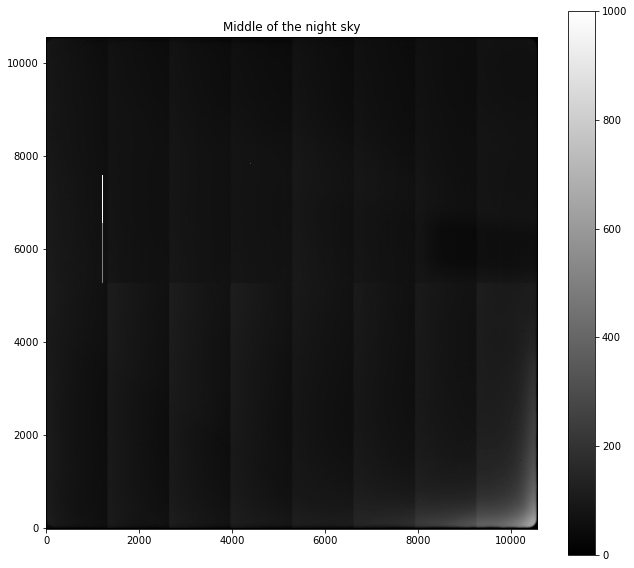

In [31]:
## sky
sky_f = "/g/lu/data/imaka/onaga/20220121/sta/reduce/sky/beehive_sky.fits"
image_data = fits.getdata(sky_f)

plt.figure(figsize=(11,10))
plt.title('Middle of the night sky')
plt.imshow(image_data, cmap='gray', vmin=0, vmax=1000, origin='lower')
plt.colorbar()
plt.show()

## Real time plots

50% EE radius = 0.250"


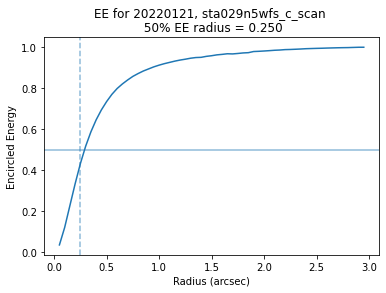

In [32]:
test_img_base = 'sta029n5wfs_c_scan'

img, hdr = fits.getdata(root_dir + f'reduce/{fld}/' + test_img_base + '_clean.fits', header=True)
scale = util.get_plate_scale(img, hdr)


from astropy.table import Table
ee = Table.read(root_dir + f'reduce/{fld}/ee/' + test_img_base + '_clean_ee.txt', format='ascii')

plt.plot(ee['Radius'], ee['EE'])
plt.xlabel('Radius (arcsec)')
plt.ylabel('Encircled Energy')

fdx = np.where(ee['EE'] < 0.5)[0][-1]
fwhm = ee['Radius'][fdx]

plt.axhline(0.5, alpha=0.5)
plt.axvline(fwhm, ls ='--',alpha=0.5)
plt.title(f"EE for {night}, {test_img_base} \n 50% EE radius = {fwhm:.3f}")


print(f'50% EE radius = {fwhm:.3f}"')

In [61]:
o_img_num = [22, 25, 28, 31, 34, 49, 53, 57, 67, 75]
i=9
test_img_base = f'sta0{o_img_num[i]}_o_scan'

Play with a star list and look at trends in FWHM, etc. 

x: fwhm_x_avg = 0.73" fwhm_x_med = 0.79" fwhm_x_std = 0.54"
x: fwhm_x_avg = 0.73" fwhm_x_med = 0.79" fwhm_x_std = 0.54"


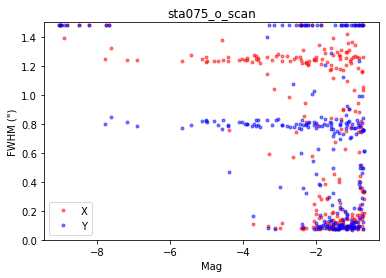

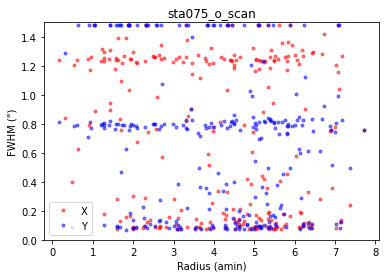

In [62]:
stars = Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars.txt', format='ascii')

# Get the plate scale
img, hdr = fits.getdata(root_dir + f'{fld}/' + test_img_base + '.fits', header=True)
scale = util.get_plate_scale(img, hdr)
del img
del hdr

plt.figure()
plt.plot(stars['mag'], stars['x_fwhm'] * scale, 'r.', label='X', alpha=0.5)
plt.plot(stars['mag'], stars['y_fwhm'] * scale, 'b.', label='Y', alpha=0.5)
plt.xlabel('Mag')
plt.ylabel('FWHM (")')
plt.legend()
plt.ylim(0, 1.5)
plt.title(test_img_base)

plt.figure()
r = np.hypot(stars['xcentroid'] - (stars['xcentroid'].max() / 2.0), 
             stars['ycentroid'] - (stars['ycentroid'].max() / 2.0)) * scale / 60.0
plt.plot(r, stars['x_fwhm'] * scale, 'r.', label='X', alpha=0.5)
plt.plot(r, stars['y_fwhm'] * scale, 'b.', label='Y', alpha=0.5)
plt.xlabel('Radius (amin)')
plt.ylabel('FWHM (")')
plt.legend()
plt.ylim(0, 1.5)
plt.title(test_img_base)

fwhm_x_avg, fwhm_x_med, fwhm_x_std = sigma_clipped_stats(stars['x_fwhm'] * scale)
fwhm_y_avg, fwhm_y_med, fwhm_y_std = sigma_clipped_stats(stars['y_fwhm'] * scale)
print(f'x: fwhm_x_avg = {fwhm_x_avg:.2f}" fwhm_x_med = {fwhm_x_med:.2f}" fwhm_x_std = {fwhm_x_std:.2f}"')
print(f'x: fwhm_x_avg = {fwhm_x_avg:.2f}" fwhm_x_med = {fwhm_x_med:.2f}" fwhm_x_std = {fwhm_x_std:.2f}"')

Text(0, 0.5, 'Emp. FWHM (")')

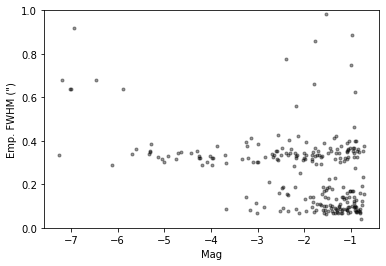

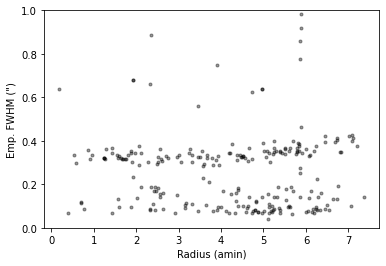

In [34]:
stars2 = Table.read(root_dir + f'reduce/{fld}/{test_img_base}_clean_stars_stats.fits')
plt.figure()
plt.plot(stars2['mag'], stars2['fwhm_emp'] * scale, 'k.', alpha=0.4)
plt.ylim(0, 1)
plt.xlabel('Mag')
plt.ylabel('Emp. FWHM (")')

plt.figure()
r = np.hypot(stars2['xcentroid'] - (stars2['xcentroid'].max() / 2.0), 
             stars2['ycentroid'] - (stars2['ycentroid'].max() / 2.0)) * scale / 60.0
plt.plot(r, stars2['fwhm_emp'] * scale, 'k.', alpha=0.4)
plt.ylim(0, 1)
plt.xlabel('Radius (amin)')
plt.ylabel('Emp. FWHM (")')

## Night-Long Stats

In [35]:
stats = Table.read(root_dir + 'reduce/stats/stats_LS_5wfs.fits')

['Image', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std']


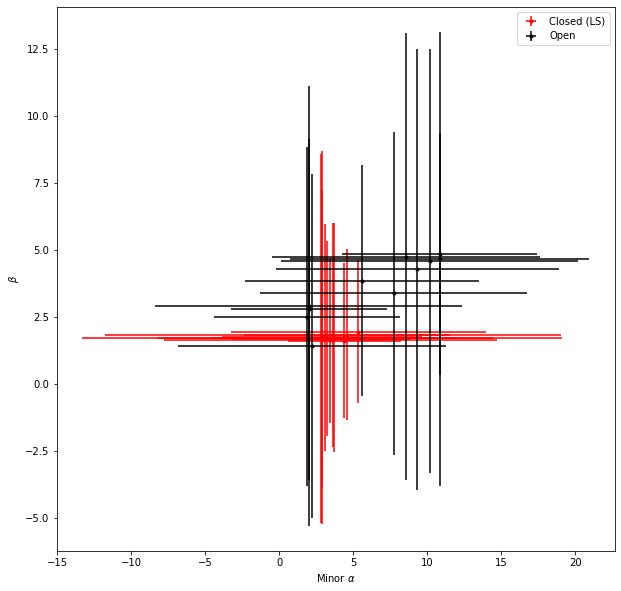

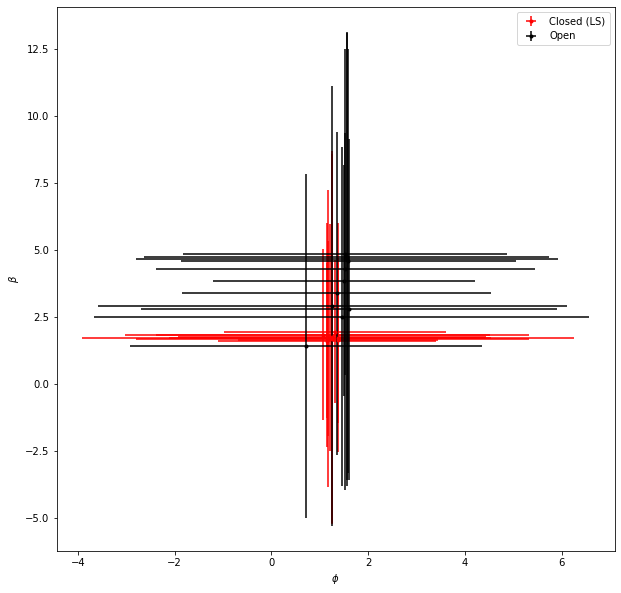

In [36]:
# stats by star 
stats_c = Table.read(root_dir + 'reduce/stats/stats_LS_5wfs.fits')
stats_o = Table.read(root_dir + 'reduce/stats/stats_open.fits')

# stats by stack? => doesn't work
#stats_c = Table.read(root_dir + 'reduce/stacks/fld2_stack_LS_c_stars_stats_mdp.fits')
#stats_o = Table.read(root_dir + 'reduce/stacks/fld2_stack__o_stars_stats.fits')

print(stats.colnames)

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Minor Alpha'], stats_c['Beta'], xerr=stats_c['Minor Alpha std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Minor Alpha'], stats_o['Beta'], xerr=stats_o['Minor Alpha std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'Minor $\alpha$')
plt.ylabel(r'$\beta$')
plt.legend()

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Phi'], stats_c['Beta'], xerr=stats_c['Phi std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Phi'], stats_o['Beta'], xerr=stats_o['Phi std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\beta$')
plt.legend()

## Star STATS

In [23]:
suffixes = list(redu.dict_suffix.keys())
suffixes

['LS_3wfs_s', 'LS_3wfs_w', 'LS_5wfs', 'open']

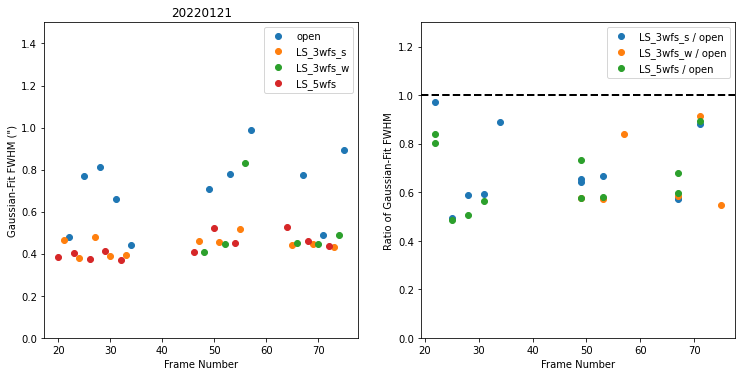

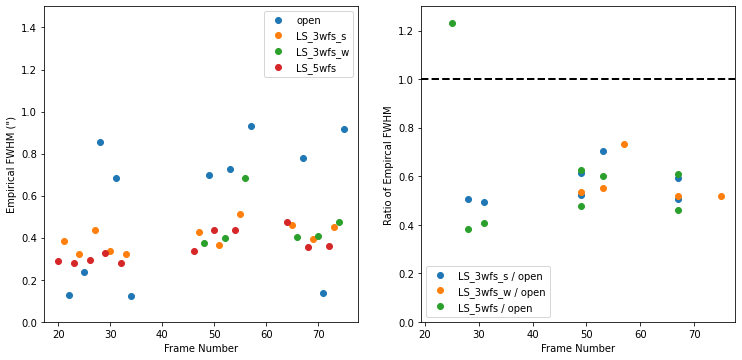

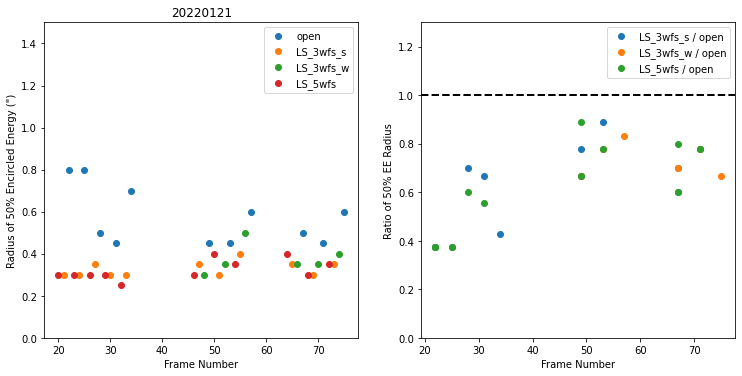

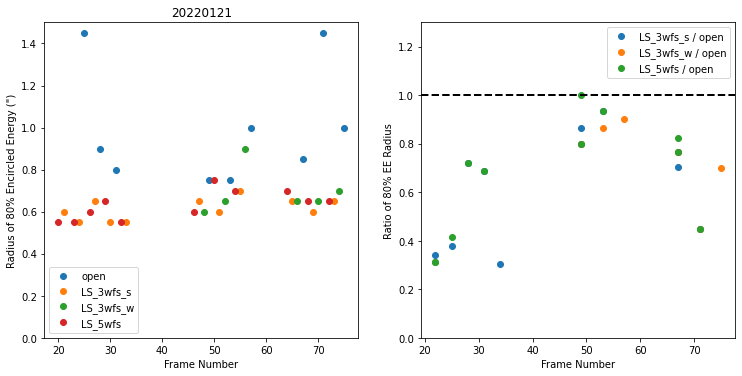

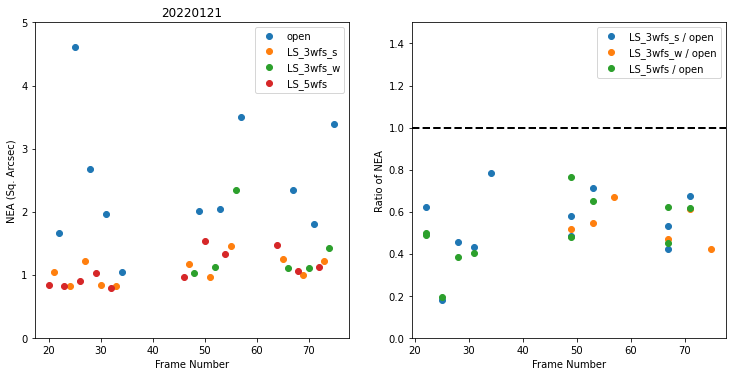

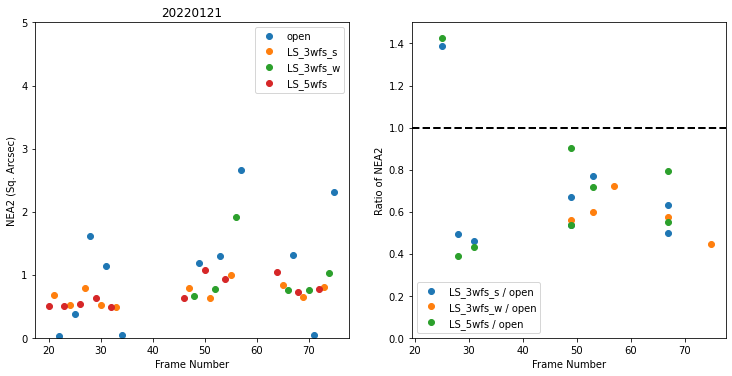

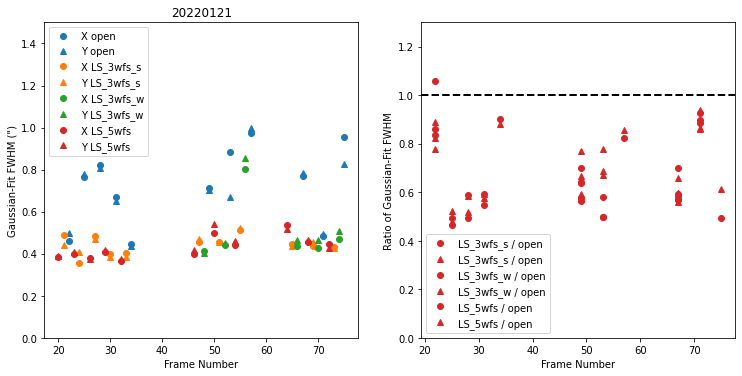

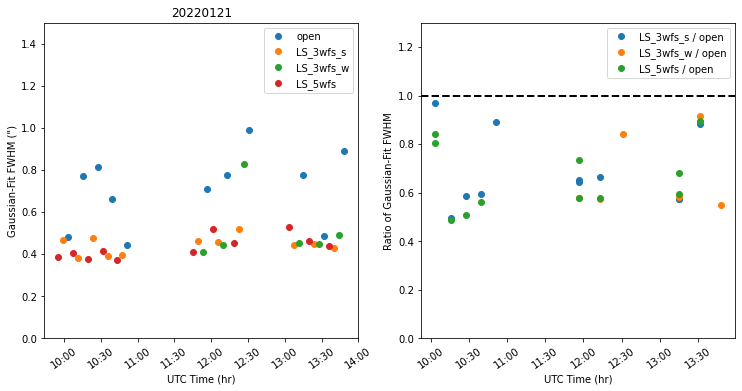

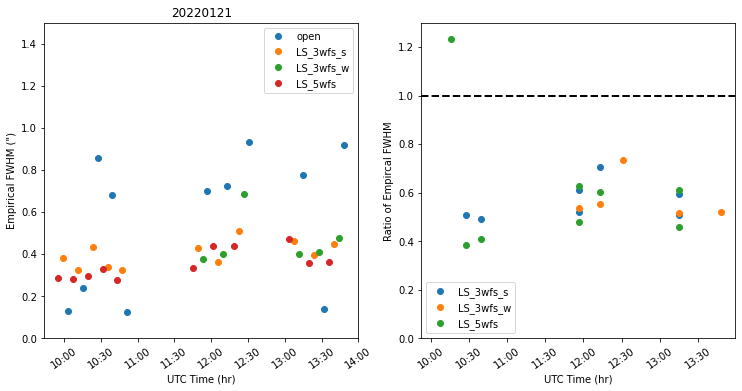

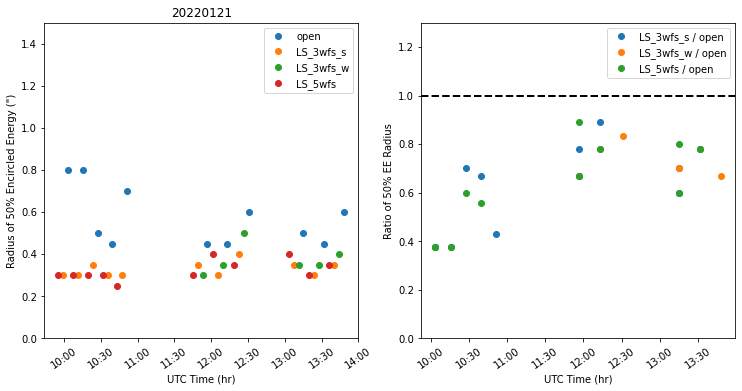

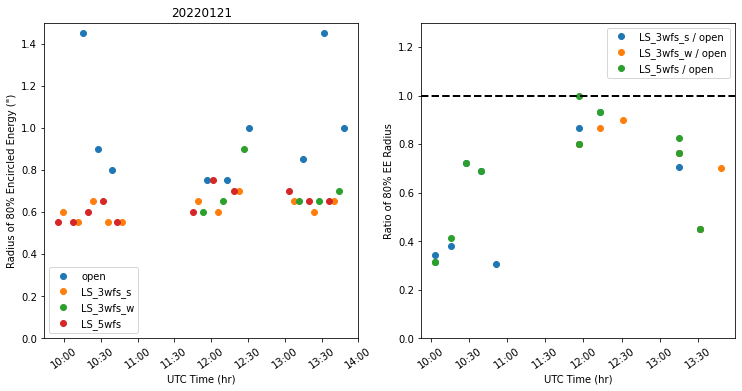

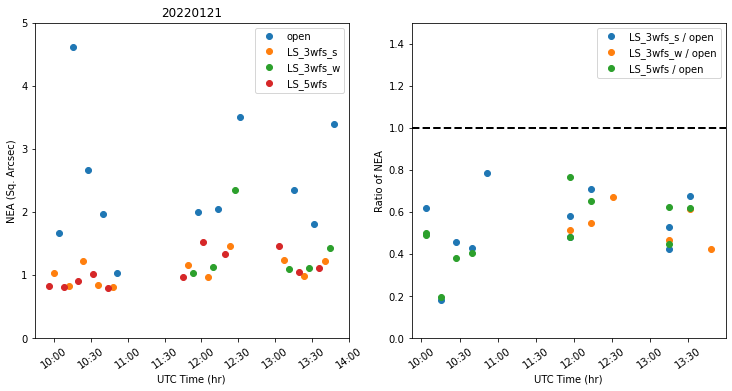

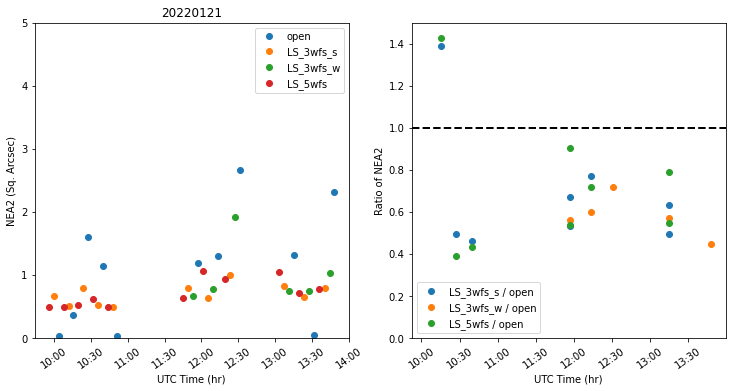

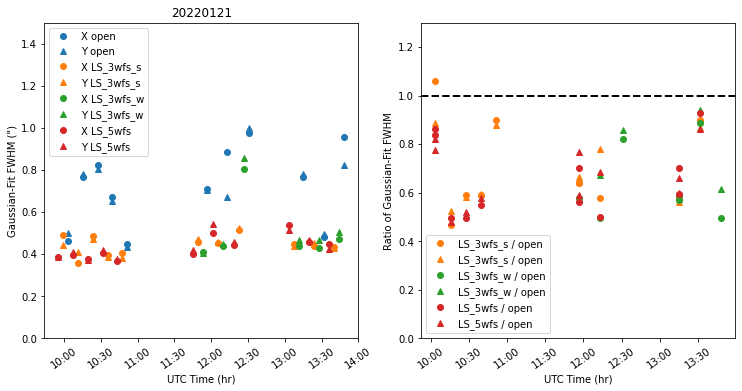

In [37]:
suffixes = ['open', 'LS_3wfs_s', 'LS_3wfs_w', 'LS_5wfs']
plot_stats.plot_stack_stats(night, suffixes=suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')

# Time Variation w/MASS-DIMM

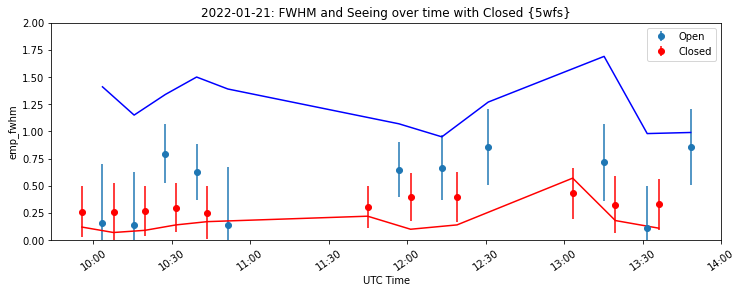

In [38]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file2 = stats_dir+ "stats_LS_5wfs_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file2, 'emp_fwhm', "2022-01-21: FWHM and Seeing over time with Closed {5wfs}", plots_dir)

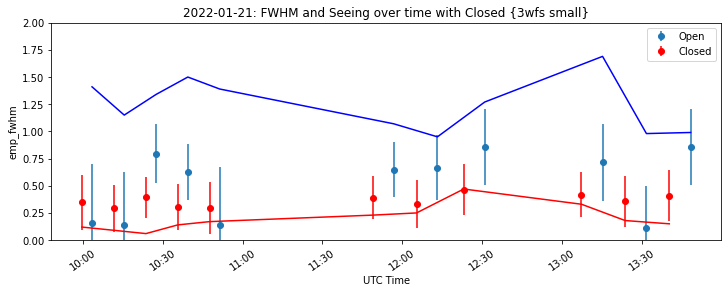

In [39]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_LS_3wfs_s_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2022-01-21: FWHM and Seeing over time with Closed {3wfs small}", plots_dir)

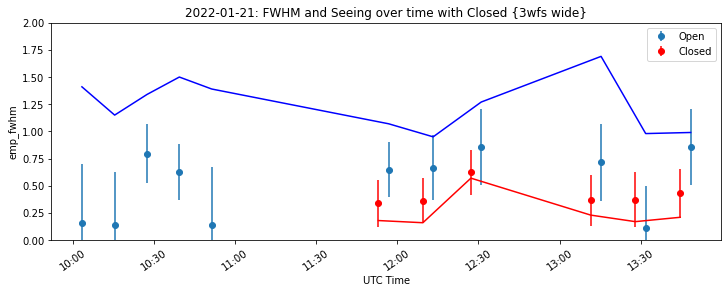

In [40]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_LS_3wfs_w_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2022-01-21: FWHM and Seeing over time with Closed {3wfs wide}", plots_dir)

# Aggregate Plots

['/g/lu/data/imaka/onaga/20220121/sta/reduce/stats/stats_open_mdp.fits', '/g/lu/data/imaka/onaga/20220121/sta/reduce/stats/stats_LS_3wfs_s_mdp.fits', '/g/lu/data/imaka/onaga/20220121/sta/reduce/stats/stats_LS_3wfs_w_mdp.fits', '/g/lu/data/imaka/onaga/20220121/sta/reduce/stats/stats_LS_5wfs_mdp.fits']


/u/eden/code/imaka/imaka/analysis/plot_stats.py:1869: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(131)
/u/eden/code/imaka/imaka/analysis/plot_stats.py:1875: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(132)
/u/eden/code/imaka/imaka/analysis/plot_stats.py:1882: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future ver

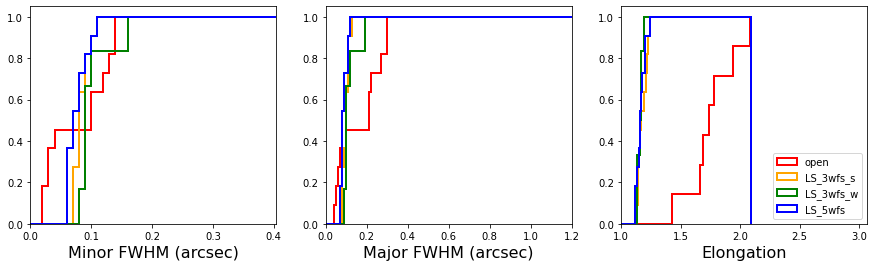

In [41]:
files = [stats_dir + 'stats_' + suffix + '_mdp.fits' for suffix in suffixes]
print(files)
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, suffixes, colors)

# Field Variability

## Closed loop, single exposure

sta029n5wfs_c_scan
Median FWHM           = 0.300"
Median FWHM (clipped) = 0.300"
Mean FWHM             = 0.280"
Mean FWHM (clipped)   = 0.237"
Stddev FWHM           = 0.423"
Stddev FWHM (clipped) = 0.114"


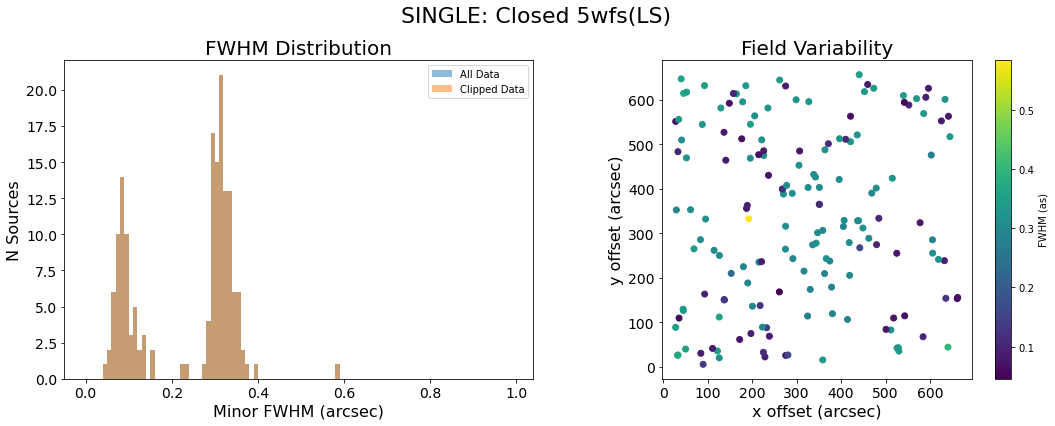

In [42]:
from importlib import reload
reload(plot_stats)
print(test_img_base)
img_file = root_dir + f'reduce/{fld}/{test_img_base}_clean.fits'
starlist = root_dir +  f'reduce/{fld}/{test_img_base}_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "SINGLE: Closed 5wfs(LS)")

sta025_o_scan
Median FWHM           = 0.097"
Median FWHM (clipped) = 0.092"
Mean FWHM             = 0.333"
Mean FWHM (clipped)   = 0.215"
Stddev FWHM           = 0.726"
Stddev FWHM (clipped) = 0.192"


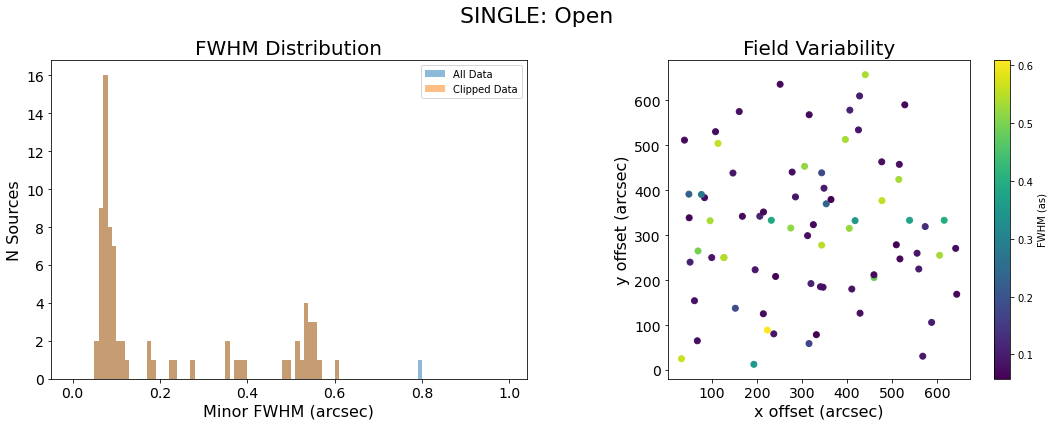

In [43]:
from importlib import reload
reload(plot_stats)
test_img_base = "sta025_o_scan"
print(test_img_base)
img_file = root_dir + f'reduce/{fld}/{test_img_base}_clean.fits'
starlist = root_dir +  f'reduce/{fld}/{test_img_base}_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "SINGLE: Open")

### Closed loop (3wfs_s)

In [20]:
img_file = stack_dir + 'beehive_stack_n3wfs_s_c.fits' 
starlist = stack_dir + 'beehive_stack_n3wfs_s_c_stars.txt'
plot_stats.plot_var(img_file, starlist, "STACK: Closed (3wfs_w)")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20220121/sta/reduce/stacks/beehive_stack_n3wfs_s_c.fits'

### Closed loop (3wfs_w)

In [29]:
img_file = stack_dir + 'beehive_stack_n3wfs_w_c.fits' 
starlist = stack_dir + 'beehive_stack_n3wfs_w_c_stars.txt'
plot_stats.plot_var(img_file, starlist, "STACK: Closed (3wfs_s)")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20220121/sta/reduce/stacks/beehive_stack_n3wfs_w_c.fits'

### Closed loop (5wfs)

In [22]:
img_file = stack_dir + 'beehive_stack_n5wfs_c.fits'
starlist = stack_dir + 'beehive_stack_n5wfs_c_stars.txt'
plot_stats.plot_var(img_file, starlist, "STACK: Closed (5wfs)")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20220121/sta/reduce/stacks/beehive_stack_n5wfs_c_stars.txt'